In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
hypso = pd.read_csv('1_hypsometrie_analyza.csv').set_index('ID')
hypso.head()

,vhodny_ziv,vhodny_soucet,vhodny_pocet
ID,,,
1,10,115.0,31.0
2,10,142.0,43.0
3,10,111.0,28.0
5,10,115.0,31.0
10,20,87.0,22.0


In [38]:
predvyber = pd.read_csv('0_predvyber_analyza.csv')
predvyber.head()

,ID,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku,zeleznice_delka,rozvodniceIII_delka,vodni_plohy_rozloha,relief_rozloha,zastavba_rozloha
0,2,0,12,1.57,19,10267.07,5409.23,138528.54,1145.86,129623.91
1,18,0,5,1.47,28,2565.37,2684.22,199327.07,0.00,411377.28
2,19,0,32,1.56,20,3652.44,3774.48,1022922.98,29590.01,1014133.46
3,24,0,12,3.63,14,2313.35,1890.75,182835.21,0.00,523542.91
4,31,0,8,3.34,15,3985.97,8718.45,67688.28,0.00,356427.71


In [39]:
predvyber_True = pd.read_csv('0_predvyber_analyza_True.csv')
predvyber_True.head()

,ID,predvyber
0,2,True
1,18,True
2,19,True
3,24,True
4,31,True


In [60]:
df = predvyber_True.join(hypso)
dfna = df.dropna()
dfna.describe()

,ID,vhodny_ziv,vhodny_soucet,vhodny_pocet
count,165.000000,165.000000,165.000000,165.000000
mean,447.339394,8.393939,107.848485,30.072727
std,228.599461,4.586163,33.986297,10.572954
min,18.000000,5.000000,25.000000,6.000000
25%,251.000000,5.000000,86.000000,22.000000
50%,484.000000,5.000000,106.000000,29.000000
75%,635.000000,10.000000,135.000000,36.000000
max,847.000000,20.000000,218.000000,63.000000


Text(0.5,0,u'Soucet linii v 16 ctvercich 1x1 km')

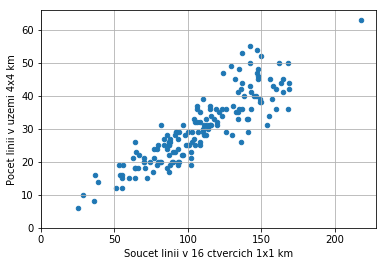

In [83]:
ax = dfna.plot.scatter(grid=True, x='vhodny_soucet', y='vhodny_pocet', ylim=0, xlim=0)
ax.set_ylabel('Pocet linii v uzemi 4x4 km') # Počet linií v území 4 x 4 km
ax.set_xlabel('Soucet linii v 16 ctvercich 1x1 km')

In [55]:
# TODO ? omezovat intervaly
ideal_sum = 16*8 #128
sum_min = ideal_sum - 50
sum_max = ideal_sum + 50
dfi = dfna[(dfna.vhodny_soucet > sum_min) & (dfna.vhodny_soucet < sum_max)]
dfi.describe()

,ID,vhodny_ziv,vhodny_soucet,vhodny_pocet
count,134.000000,134.000000,134.000000,134.000000
mean,470.895522,8.731343,117.895522,32.716418
std,223.598602,4.408065,25.621675,8.973320
min,18.000000,5.000000,79.000000,17.000000
25%,286.250000,5.000000,94.500000,26.000000
50%,496.500000,10.000000,113.500000,31.000000
75%,646.500000,10.000000,139.500000,38.750000
max,847.000000,20.000000,169.000000,55.000000


In [67]:
dfi.head()

,ID,predvyber,vhodny_ziv,vhodny_soucet,vhodny_pocet
1,18,True,10.0,115.0,31.0
2,19,True,10.0,142.0,43.0
3,24,True,10.0,111.0,28.0
5,37,True,10.0,115.0,31.0
10,48,True,20.0,87.0,22.0
